# trying kaggle stuff

In [8]:
!pip install mlcroissant

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/569.0 kB ? eta -:--:--
   ---------------------------------------- 569.0/569.0 kB 7.3 MB/s  0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15234 sha256=8fecaed10b972412acaeb0bdce16584e149c796f610894d7884c70e02ff7bf0f
  Stored in directory: c:\users\muham\appdata\local\pip\cache\wheels\e5\6b\25\0e13e900c59946c4724aa54c1add9033d803112090b76768ee
Successfully built jsonpath-rw

   ----- ---------------------------------- 1/8 [rdflib]
   ----- ---------------------------------- 1/8 [rdflib]
   ----- ---------------------------------- 1/8 [rdflib]
   ----- ---------------------

In [11]:
import mlcroissant as mlc
import itertools

In [13]:
import mlcroissant as mlc
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

CROISSANT_URL = "https://www.kaggle.com/datasets/kushagraarya10/cia-global-statistical-database/croissant/download"

croissant_dataset = mlc.Dataset(CROISSANT_URL)

record_set_ids = [record.id for record in croissant_dataset.metadata.record_sets]
print("Available record sets or csv stuff")
for record_id in record_set_ids:
    print(f"{record_id}")

  -  [Metadata(CIA Global Statistical Database)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(CIA Global Statistical Database)] Property "https://schema.org/version" is recommended, but does not exist.


Available record sets or csv stuff
communications_data.csv
demographics_data.csv
economy_data.csv
energy_data.csv
geography_data.csv
government_and_civics_data.csv
transportation_data.csv


In [ ]:
def record_to_dataframe(dataset: mlc.Dataset, record_id: str) -> pd.DataFrame:
    rows = list(dataset.records(record_set=record_id))
    if not rows:
        return pd.DataFrame()
    if isinstance(rows[0], dict):
        return pd.DataFrame(rows)
    # Fallback for row tuples; rely on metadata field ordering
    field_names = [field.name for field in dataset.metadata.record_sets[record_id].fields]
    return pd.DataFrame(rows, columns=field_names)


def show_dataframe_summary(df: pd.DataFrame, title: str, max_hist_cols: int = 4) -> None:
    print(f"{title} — shape: {df.shape}")
    display(df.head())

    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    if not numeric_cols:
        print("fuck No numeric columns available for visualization.")
        return

    cols_to_plot = numeric_cols[:max_hist_cols]
    axes = df[cols_to_plot].hist(bins=20, figsize=(4 * len(cols_to_plot), 4))
    plt.suptitle(f"{title}: distributions for {', '.join(cols_to_plot)}", fontsize=14)
    plt.tight_layout()
    plt.show()


communications_data.csv — shape: (259, 6)


,communications_data.csv/Country,communications_data.csv/telephone_fixed_subscriptions_total,communications_data.csv/mobile_cellular_subscriptions_total,communications_data.csv/internet_country_code,communications_data.csv/internet_users_total,communications_data.csv/broadband_fixed_subscriptions_total
0,b'AFGHANISTAN',150000.0,23000000.0,b'.af',b'7020000',26570.0
1,b'AKROTIRI',NaN,NaN,None,None,NaN
2,b'ALBANIA',197690.0,2635466.0,b'.al',b'2291000',508937.0
3,b'ALGERIA',5097095.0,47028685.0,b'.dz',b'31240000',3790459.0
4,b'AMERICAN SAMOA',10000.0,2250.0,b'.as',b'18135',NaN


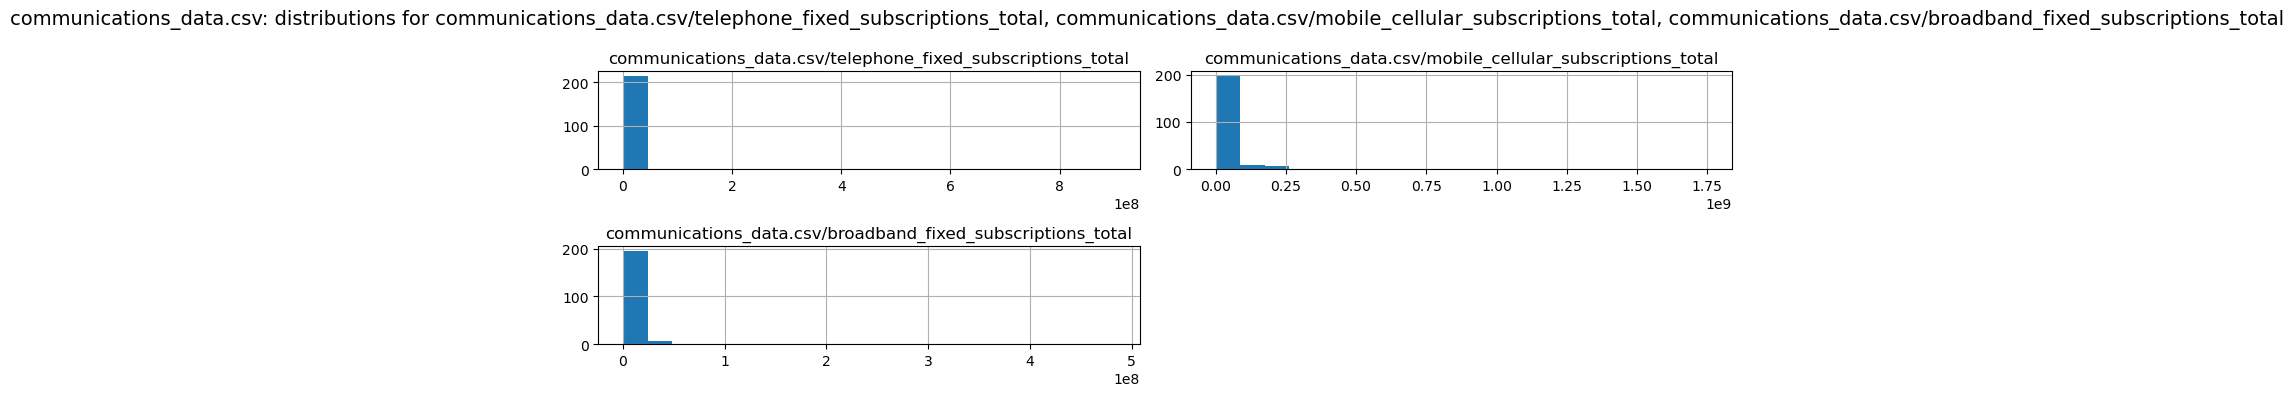

GenerationError: An error occured during the streaming generation of the dataset, more specifically during the operation Read(demographics_data.csv_fileobject)

In [15]:
for record_id in record_set_ids:
    df = record_to_dataframe(croissant_dataset, record_id)
    show_dataframe_summary(df, title=record_id)
